In [99]:
# Predicting price of pre-owned cars based on various attributes associated with the car
# Storm Motors data, they are mediators 

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# importing the data set
cars_data=pd.read_csv('cars_sampled.csv')
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


- dependent variable - numerical

- Solution Conceptulaziation

- identify if data is clean

- look for missing values

- Identify variables influencing price and look for relationship among variables (correlation, boxplot,scatter etc)

- identify outliers (central tendency mesures, dispersion maeasures, box plots, histograms etc.

- Identify if categories with meagre frequencies can be combined
 
- Filter data based on logical checks & reduced number of data

- Method Identification ( Linear Regression, Random forest)




In [102]:
# Create copy
cars=cars_data.copy()

In [103]:
# Structure of the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

- missing values (vehicleType, gearbox, model,fuelType,notRepairedDamage )

In [104]:
# SUMMARIZING DATA
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


- WE NEED TO CONVERT PRICE INTO 3 DECIMAL FLOAT VALUES

In [105]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [106]:
# To display max set of columns
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [107]:
# Dropping unwanted columns
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [108]:
# removing duplicates
cars.drop_duplicates(keep='first',inplace=True)
cars.shape

(49531, 14)

In [109]:
#                                 Data Cleaning

In [110]:
# no. of missing values
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

- missing values (vehicleType, gearbox, model,fuelType,notRepairedDamage )

In [111]:
# Variable yearsOfRegistration

In [112]:
pd.set_option('display.max_rows', 50000)
cars['yearOfRegistration'].value_counts().sort_index()

1000       6
1255       1
1500       2
1910      14
1928       1
1929       1
1933       1
1934       1
1936       2
1938       1
1940       1
1941       1
1943       2
1945       2
1947       2
1950       4
1951       4
1952       3
1953       2
1954       1
1955       6
1956       7
1957       5
1958       4
1959       5
1960      32
1961       7
1962       6
1963      11
1964      16
1965      11
1966      13
1967      18
1968       7
1969      25
1970      55
1971      27
1972      39
1973      17
1974      24
1975      21
1976      31
1977      28
1978      49
1979      49
1980      77
1981      32
1982      39
1983      57
1984      49
1985     110
1986      53
1987      80
1988     132
1989     197
1990     395
1991     408
1992     391
1993     455
1994     622
1995    1267
1996    1403
1997    1956
1998    2428
1999    3026
2000    3275
2001    2782
2002    2554
2003    2731
2004    2597
2005    3101
2006    2660
2007    2347
2008    2186
2009    2010
2010    1643
2011    1544

In [113]:
sum(cars['yearOfRegistration']>2018)
sum(cars['yearOfRegistration']<1950)

38

-  sum of cars greater than 2018 = 26

-  sum of cars less than 1950 = 38

-  these are two less and can be ignored

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

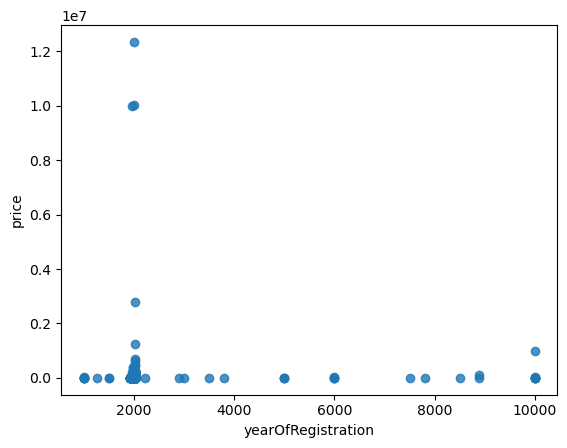

In [114]:
sns.regplot(x='yearOfRegistration',y='price',scatter=True, fit_reg= False, data=cars)

In [115]:
#Variable Price
cars['price'].value_counts().sort_index()

0           1415
1            172
2              1
3              1
5              4
7              1
8              2
10             5
11             1
12             1
14             1
15             8
20             6
21             1
25             5
26             1
30             7
35             4
39             1
40             3
45             6
50            41
55             3
60             7
65             1
70             2
75             9
77             1
80            12
85             3
90             5
95             2
98             1
99            15
100          145
101            1
110            2
111            3
120           31
121            1
122            1
125            6
129            2
130           11
135            2
139            2
140            5
145            2
149            5
150          183
155            1
156            1
159            1
160            9
170           13
175            8
180           35
185            2
189           

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

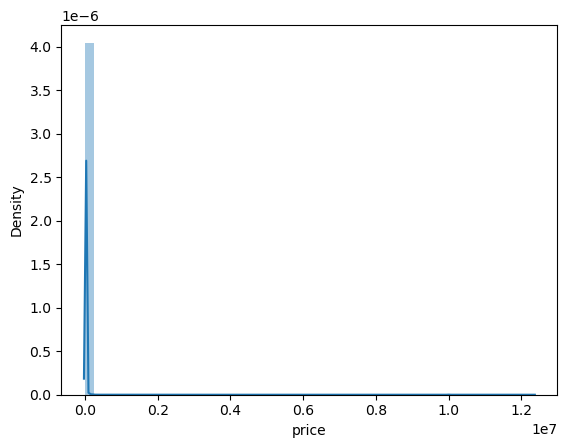

In [116]:
# Histogram
sns.distplot(cars['price'])

In [117]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

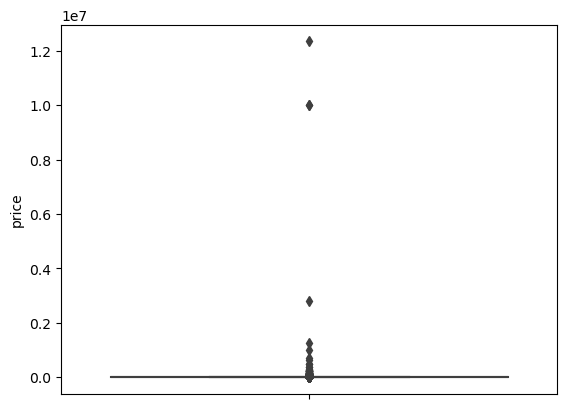

In [118]:
sns.boxplot(y=cars['price'])

In [119]:
sum(cars['price']>150000)
sum(cars['price']<100)

1748

- sum of cars with price greater than 150000= 34

- sum of cars less than price 100= 1748

- both can be ignored

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5565

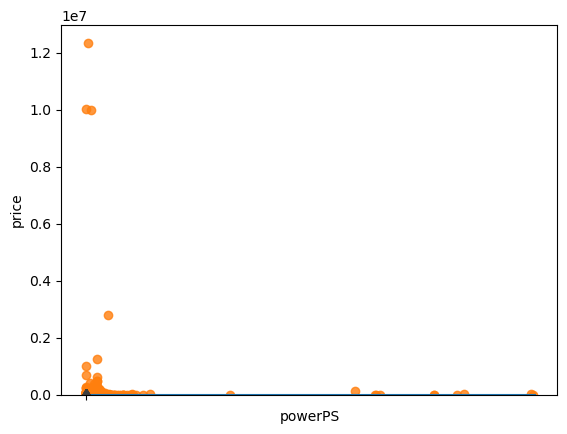

In [120]:
# Varibale Power PS
cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS',y='price',scatter=True, fit_reg= False, data=cars)
sum(cars['powerPS']>500)
sum(cars['powerPS']<10)
 



- sum for less than 10= 5565

- sum for 500 is = 115

- workable range is 10=500

In [121]:
# Setting up working range of data
cars= cars[
    (cars.yearOfRegistration<=2018)
    &(cars.yearOfRegistration>=1950)
    &(cars.price<=150000)
    &(cars.price>=100)
    &(cars.powerPS>=10)
    &(cars.powerPS<=500)
]

In [122]:
cars.shape

(42772, 14)

In [123]:
# to find the age of car, divide month of registration by 12 and it to year of reigistration-2018
cars['Age']= (2018-cars['yearOfRegistration']) + (cars['monthOfRegistration']/12)   

In [124]:
# need to round off the values of age
cars['Age']=round(cars['Age'],2)

In [125]:
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [126]:
# Dropping year and month of registration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Age'>

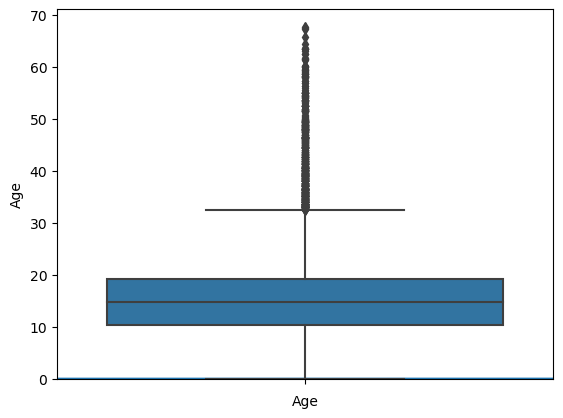

In [127]:
# visualizing age
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

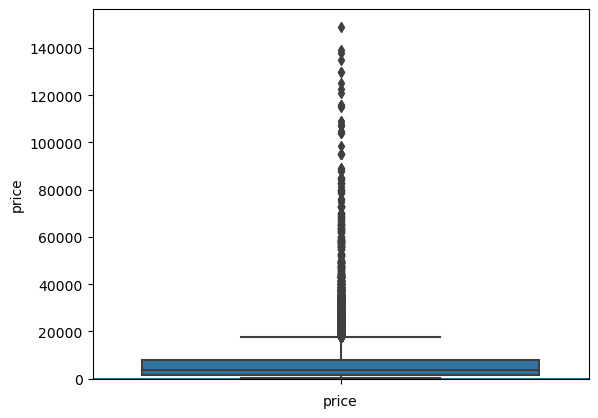

In [128]:
# visualizing price
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='powerPS'>

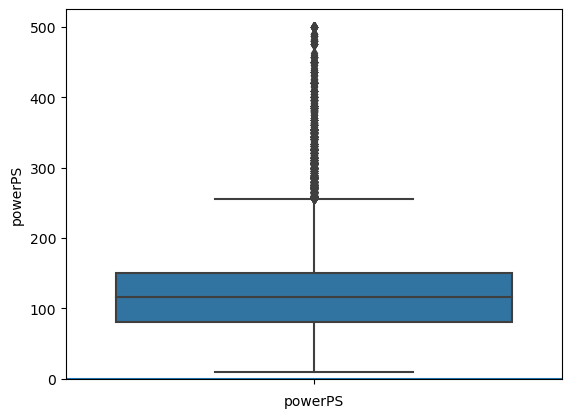

In [129]:
# visualizing powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['powerPS'])


<AxesSubplot:xlabel='Age', ylabel='price'>

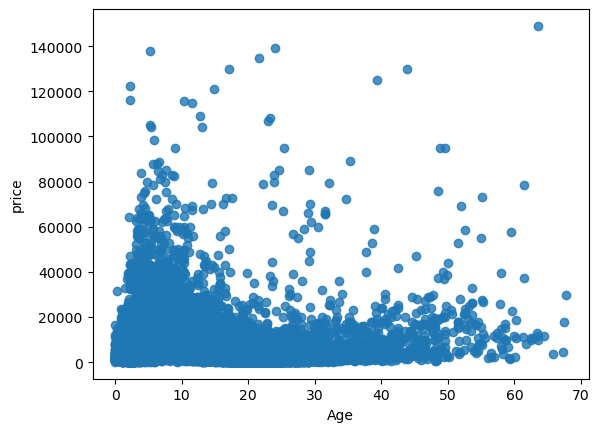

In [130]:
# Visualizing parameters after naroowing down working range
# Age vs price
sns.regplot(x='Age',y='price',scatter=True,
           fit_reg=False, data=cars)

- cars priced higher are newer

- with increase in age, price decreases

- however few cars are priced highers with increased age

<AxesSubplot:xlabel='powerPS', ylabel='price'>

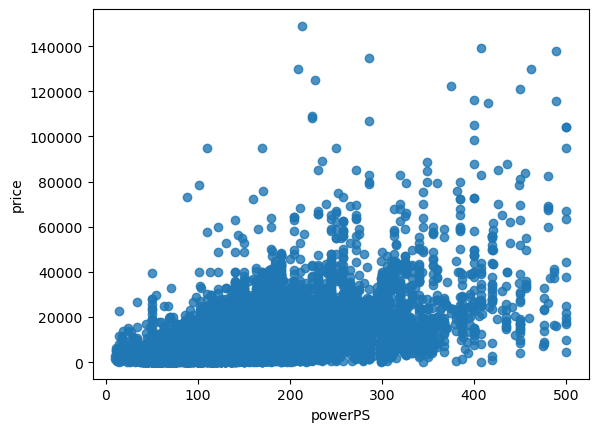

In [131]:
# powerPS vs price
sns.regplot(x='powerPS',y='price',scatter=True,
           fit_reg=False, data=cars)

- increase in power increases price

<AxesSubplot:xlabel='seller', ylabel='count'>

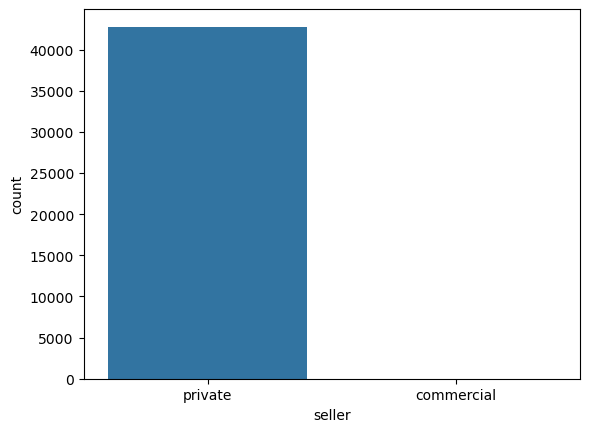

In [132]:
# variable Seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count', normalize=True)
sns.countplot(x='seller', data=cars)

- fewer cars have 'commercial' so this coulumns is insignificant

<AxesSubplot:xlabel='offerType', ylabel='count'>

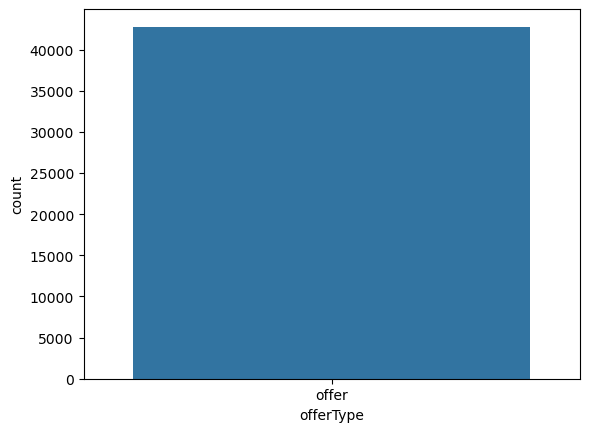

In [133]:
#variable offer type
cars['offerType'].value_counts()
sns.countplot(x='offerType', data=cars)

- insignificant

<AxesSubplot:xlabel='abtest', ylabel='price'>

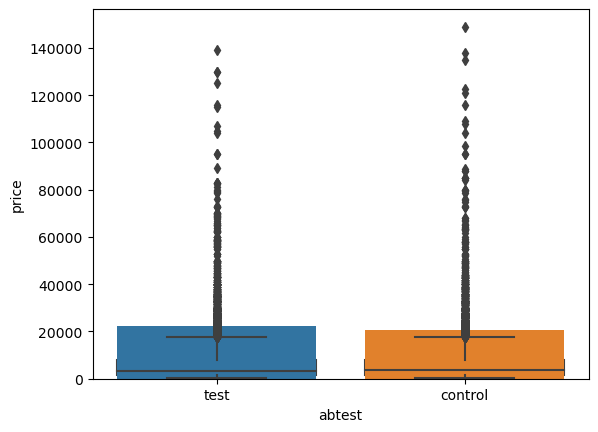

In [134]:
#variable abtest
cars['abtest'].value_counts()
sns.countplot(x='abtest',data=cars)
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.boxplot(x='abtest',y='price',data=cars)


- Equally distributed

- but after boxplot: seems same median , mean

- for every price value there is almost 50-50 distribution

- does not affect price- insgnificant

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

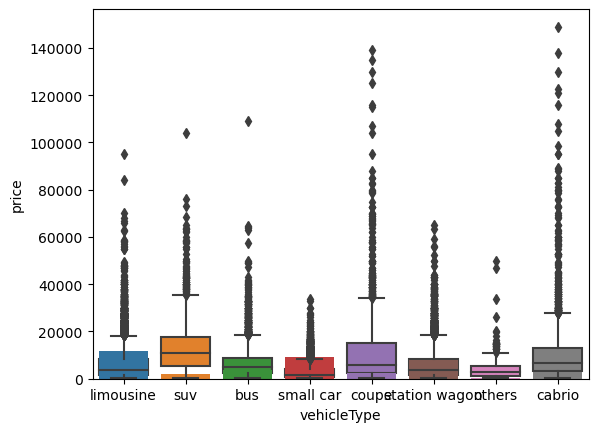

In [135]:
#variable vehicleType
cars['vehicleType'].value_counts()
sns.countplot(x='vehicleType',data=cars)
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.boxplot(x='vehicleType',y='price',data=cars)


- 8 types of cars

- it affects price

<AxesSubplot:xlabel='gearbox', ylabel='price'>

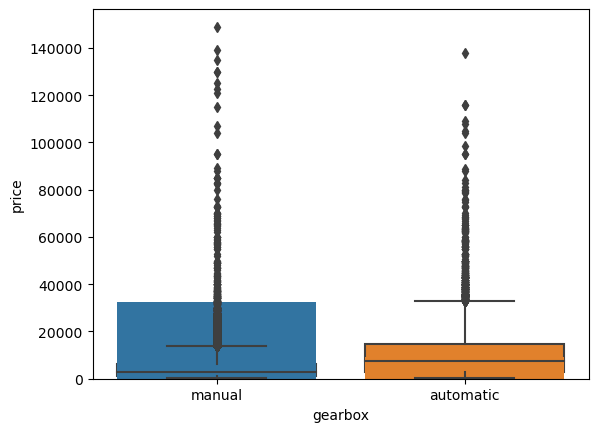

In [136]:
#variable gearbox
cars['gearbox'].value_counts()
sns.countplot(x='gearbox',data=cars)
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.boxplot(x='gearbox',y='price',data=cars)


- gearbox affects price

<AxesSubplot:xlabel='model', ylabel='price'>

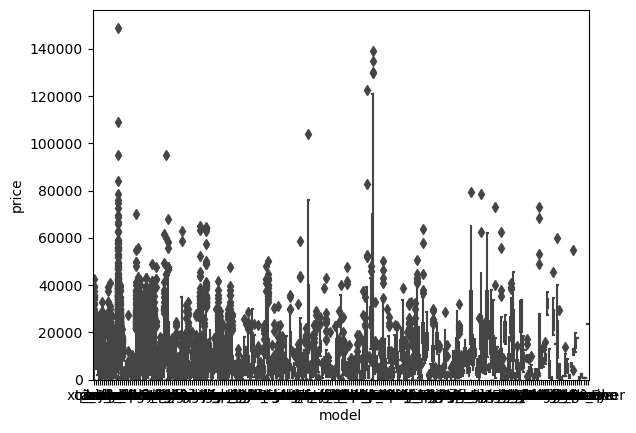

In [137]:
#variable model
cars['model'].value_counts()
sns.countplot(x='model',data=cars)
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.boxplot(x='model',y='price',data=cars)


- cars are distributed over many models

- considered in modeliing

<AxesSubplot:xlabel='kilometer', ylabel='price'>

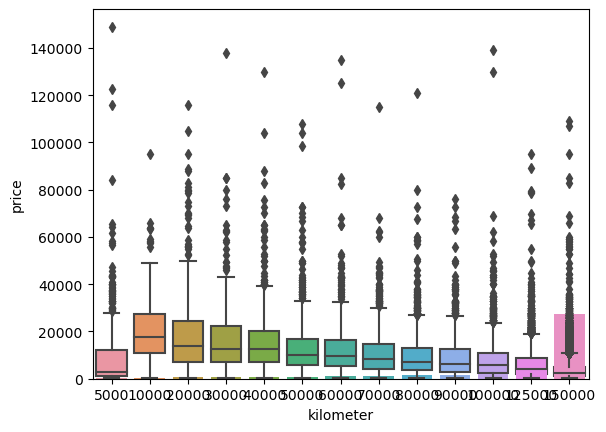

In [138]:
#variable kilometer
cars['kilometer'].value_counts()
sns.countplot(x='kilometer',data=cars)
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x='kilometer',y='price',data=cars)


- considered in modelling

<AxesSubplot:xlabel='fuelType', ylabel='price'>

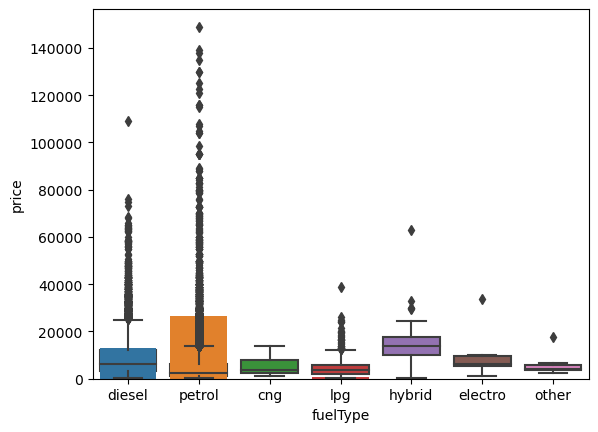

In [139]:
#variable fuelType
cars['fuelType'].value_counts()
sns.countplot(x='fuelType',data=cars)
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.boxplot(x='fuelType',y='price',data=cars)


- fuelType affects price

<AxesSubplot:xlabel='brand', ylabel='price'>

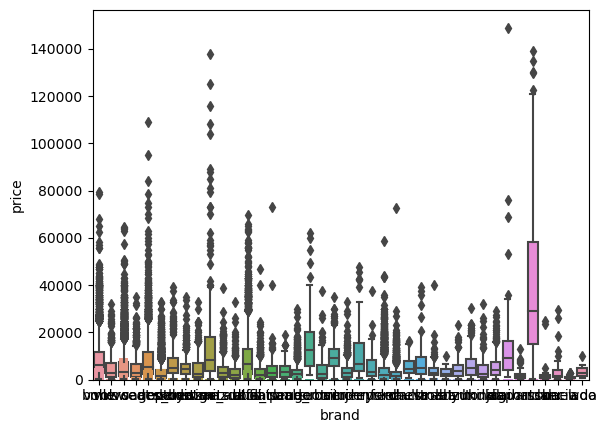

In [140]:
#variable brand
cars['brand'].value_counts()
sns.countplot(x='brand',data=cars)
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.boxplot(x='brand',y='price',data=cars)


- cars are distributed over many brands
- consideres for modelling

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

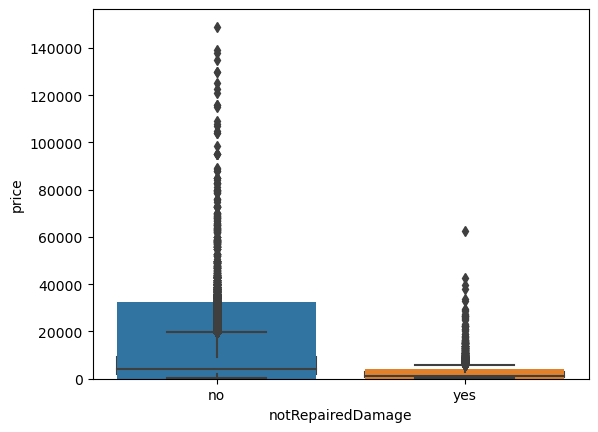

In [141]:
#variable notRepairedDamage
cars['notRepairedDamage'].value_counts()
sns.countplot(x='notRepairedDamage',data=cars)
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.boxplot(x='notRepairedDamage',y='price',data=cars)


- cars that require the damages to be repaired fall under lower price ranges

In [142]:
# removing insignificant variables
col=['seller','offerType', 'abtest']
cars=cars.drop(columns=col,axis=1)

In [143]:
cars_copy=cars.copy()

In [144]:
# Correlation
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
correlation

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [145]:
# omitting values

-we are going to build a Linear regression and random forest modelon two sets of data
- data obtained by omitting rows with missing values
- data obtained by imputing the missing values

In [146]:
# Omitting Values
cars_omit=cars.dropna(axis=0)

In [147]:
# converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [148]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [149]:
# Model Building with omitted Data

In [150]:
# separating input and ouput features
x1=cars_omit.drop(['price'],axis='columns',inplace=False)
y1= cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

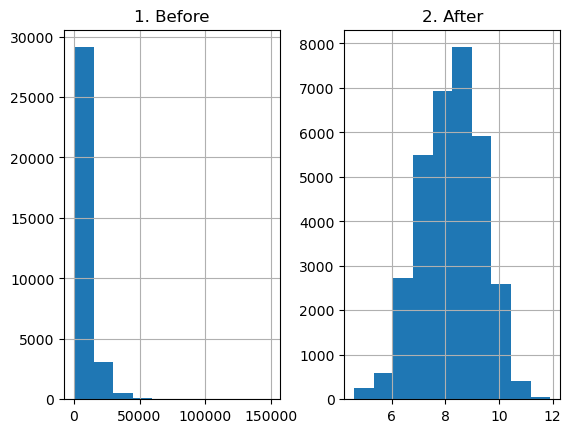

In [151]:
# Plotting the variable price
import pandas as pd
prices=pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

- proper bell shaped curve as natural log values of y1

In [152]:
#transforming prices as a logrithmic values
y1=np.log(y1)

-range of price is very skewed so we use log values of it

In [153]:
#splitting data into test and train
X_train,X_test,y_train,y_test= train_test_split(x1,y1,test_size=0.3, random_state=3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23018, 300), (9866, 300), (23018,), (9866,))

In [154]:
# Baseline Model for Omitted data
# we are making a base model by using test data mean values
# this is to set a benchmark and to compare with our regression model

In [155]:
# finding the mean for test data value
base_pred=np.mean(y_test)
base_pred

8.249615787653337

In [156]:
# repeating same value till length of test data
base_pred=np.repeat(base_pred,len(y_test))
base_pred

array([8.24961579, 8.24961579, 8.24961579, ..., 8.24961579, 8.24961579,
       8.24961579])

In [157]:
# finding rmse
import numpy as np
from sklearn.metrics import mean_squared_error
base_root_mean_square_error= np.sqrt(mean_squared_error (y_test,base_pred))
base_root_mean_square_error

1.1274483657478247

- objective is , whichever model we build the RMSE value should be less than base RMSE

In [194]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error

In [158]:
# Linear regression with omitted data


In [159]:
# Setting Intercept as true
lgr=LinearRegression(fit_intercept=True)

In [160]:
lgr

LinearRegression()

In [161]:
#Model
model_lin1=lgr.fit(X_train,y_train)


In [162]:
# Prediction model on test set
cars_predictions_lin1=lgr.predict(X_test)

In [163]:
# computing MSE and RMSE
lin_mse1=mean_squared_error(y_test,cars_predictions_lin1)
lin_rmse=np.sqrt(lin_mse1)
lin_rmse

0.5455481266513853

-less than base rmse

In [196]:
# mean absolute error
mean_absolute_error(y_test,cars_predictions_lin1)

0.3822197835630038

In [164]:
# Rsquared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
r2_lin_test1,r2_lin_test1

(0.7658615091649232, 0.7658615091649232)

- train is better than test, close cut, model is good. 

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

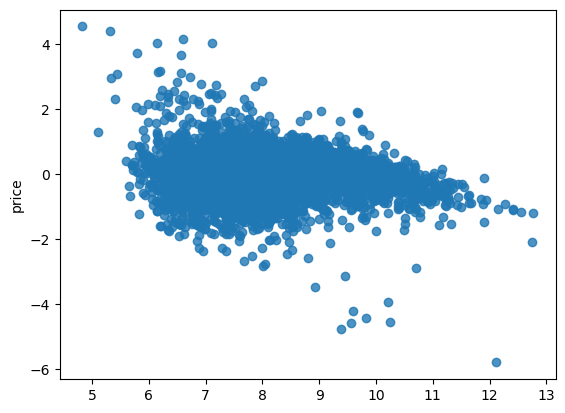

In [165]:
# regression diagnostic - residuals plot analysis
# diff between test data and prediction
residuals=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1,scatter=True,
           fit_reg=False,data=cars)
residuals.describe()

-mean is too low, and plot is not skewed

In [166]:
# RANDOM FOREST WITH OMITTED DATA

In [167]:
# model parametes
rf=RandomForestRegressor(n_estimators=100,max_features='auto',
                        max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [168]:
#Model
model1_rf1=rf.fit(X_train,y_train)

In [169]:
# Predicting model on test set
cars_predictions_rf1=rf.predict(X_test)

In [170]:
#Computing MSE and RMSE
rf_mse1= mean_squared_error(y_test,cars_predictions_rf1)
rf_rmse1=np.sqrt(rf_mse1)
rf_mse1,rf_rmse1

(0.19016020985430382, 0.4360736289370223)

- Random Forest perfroming better than Linear regression , as rmse has gone down more


In [197]:
# mean absolute error
mean_absolute_error(y_test,cars_predictions_rf1)

0.3009401766279117

In [171]:
 # MODEL BUILDING WITH IMPUTED DATA

In [172]:
cars_imputed=cars.apply(lambda x:x.fillna(x.median()) 
             if x.dtype=='float' else 
            x.fillna(x.value_counts().index[0]))

In [173]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [174]:
# converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [175]:
#separating inout and utput features
x2= cars_imputed.drop(['price'],axis='columns', inplace =False)
y2= cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

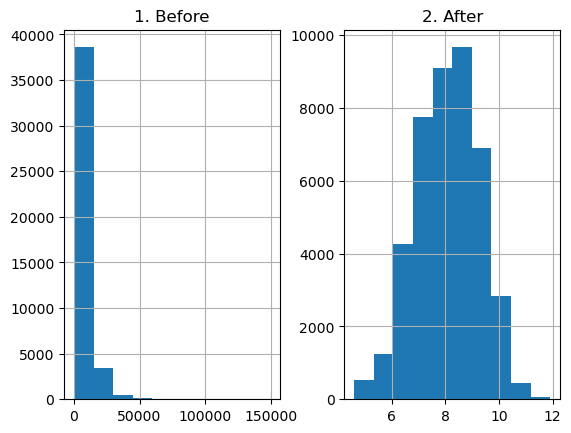

In [176]:
# plotting variables price
prices=pd.DataFrame({"1. Before":y2,"2. After":np.log(y2)})
prices.hist()

In [177]:
# transforming prices as alogarithmic values
y2= np.log(y2)

In [178]:
#splitting into test and train
X_train1,X_test1,y_train1,y_test1=train_test_split(x2,y2, test_size=0.3,random_state=3)

In [179]:
#Baseline Model
# we are making base line model by using test data mean values
# to set a benchmark and to compare regression model

In [180]:
# finding mean for test data values
base_pred=np.mean(y_test1)
base_pred

8.068391740519193

In [181]:
#repeating same value till length of test data
base_pred=np.repeat(base_pred,len(y_test1))
base_pred

array([8.06839174, 8.06839174, 8.06839174, ..., 8.06839174, 8.06839174,
       8.06839174])

In [182]:
# finding rmse of baseline model
import numpy as np
from sklearn.metrics import mean_squared_error
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(y_test1,base_pred))
base_root_mean_square_error_imputed

1.1884349112889792

In [183]:
# Linear regression with imputed data
#Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [184]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [185]:
#Predicting model on test set
cars_predictions_lin2=lgr2.predict(X_test1)

In [186]:
# computing MSE and Rmse
lin_mse2=mean_squared_error(y_test1,cars_predictions_lin2)
lin_rmse2= np.sqrt(lin_mse2)
lin_mse2, lin_rmse2

(0.42041691235528117, 0.6483956449231296)

rmse has gone up

In [198]:
# mean absolute error
mean_absolute_error(y_test1,cars_predictions_lin2)

0.474928099705421

In [187]:
#                              Random Forest with imputed data
# model parametes
rf2=RandomForestRegressor(n_estimators=100,max_features='auto',
                        max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [188]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)

In [189]:
# predicting the model on test set
cars_predictions_rf2= rf2.predict(X_test1)

In [190]:
#computing MSE and RMSE
rf_mse2=mean_squared_error(y_test1,cars_predictions_rf2)
rf_rmse2=np.sqrt(rf_mse2)
rf_mse2, rf_rmse2

(0.2443463250684118, 0.494313994408829)

-RMSE has gone below the Linear regression with Imputed data

In [191]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1, y_train1)
r2_rf_test2, r2_rf_train2

(0.8269964521311131, 0.9024289431669166)

- much better r squared value than Linear regression model with imputed data

In [199]:
# mean absolute error
mean_absolute_error(y_test1,cars_predictions_rf2)

0.34304025186457965

- In omitted set of data Random Forest is performing better than Linear Regression model


- In imputed data set is Random Forest performing better than Linear Regression

- Overall omitted data set with Random Forest model worked better

- mean absolute error regression omitted data 0.3822197835630038
- mean absolute error random forest with omiited data 0.3009401766279117
- mean absolute error regression with imputed data 0.474928099705421
- mean absolute error random forest with imputed data 0.34304025186457965
